# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)
#n_train = y_train.shape[0]

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
#plot random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def plot_random_signs(picture_set, picture_set_labels, no_of_signs, no_of_cols, title):
    indexes = (np.random.randint(len(picture_set), size=(1, no_of_signs)))[0]

    fig, axes = plt.subplots(int(np.ceil(no_of_signs/no_of_cols)), no_of_cols, figsize=(10,10))
    fig.tight_layout()

    for i, axis in enumerate(axes.flat):
        if i<no_of_signs: 
            axis.imshow(picture_set[indexes[i]])
            xlabel = "Label {0}".format(picture_set_labels[indexes[i]])
            axis.set_xlabel(xlabel)
        axis.set_xticks([])
        axis.set_yticks([])    


    plt.show()
    fig.savefig('./examples/'+title+'.jpg')


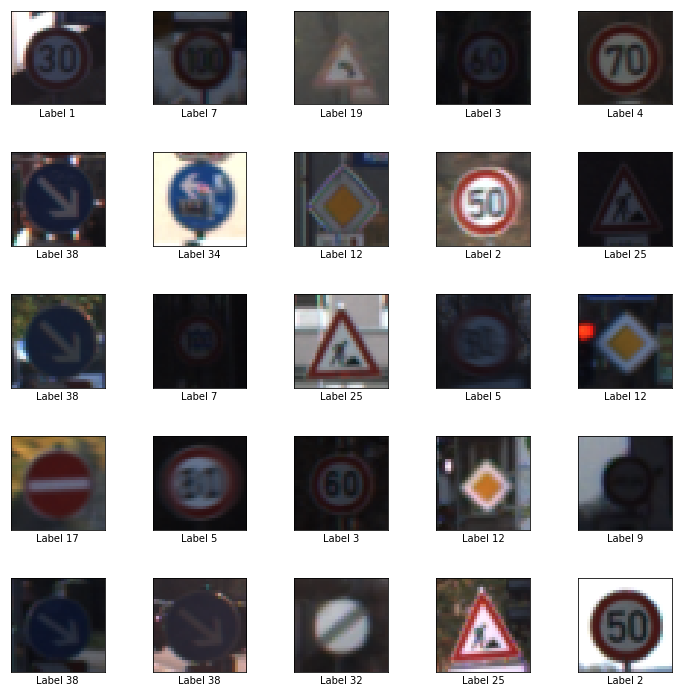

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
plot_random_signs(X_train,y_train,25,5, 'random_train')

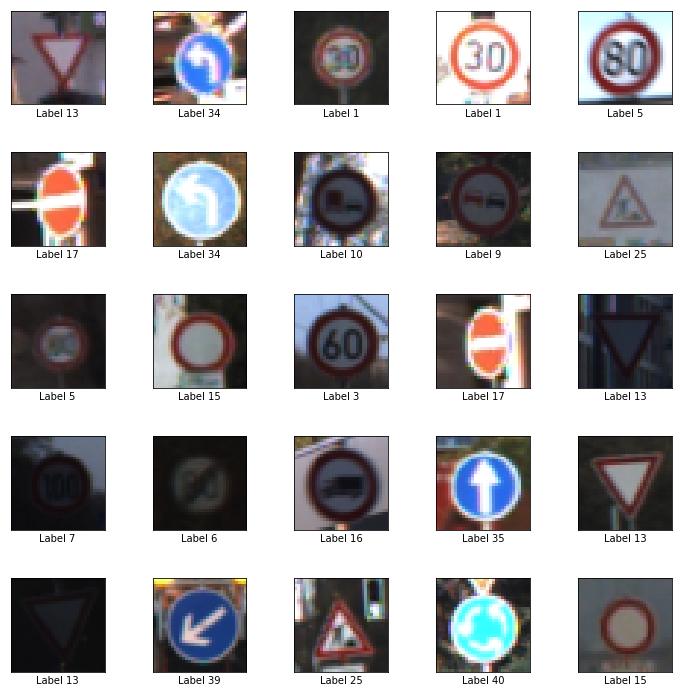

In [5]:
plot_random_signs(X_valid,y_valid,25,5, 'random_valid')

In [6]:
#Explore the distribution of the classses
def plot_distribution_per_class(picture_set, x_label, y_label, title, filename):
    plt.figure(figsize=(10,10))
    n, bins, patches = plt.hist(picture_set, n_classes, facecolor='blue', rwidth=0.7)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.savefig('./examples/'+filename+'.jpg')

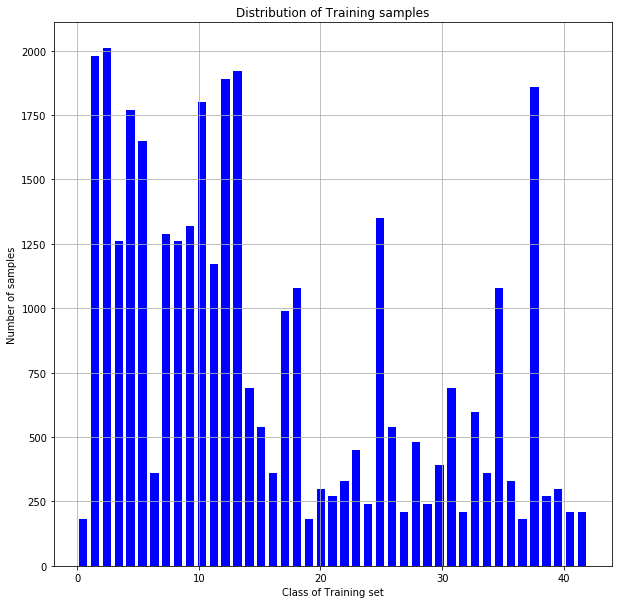

In [7]:
plot_distribution_per_class(y_train,"Class of Training set", "Number of samples", "Distribution of Training samples","distrib_train")

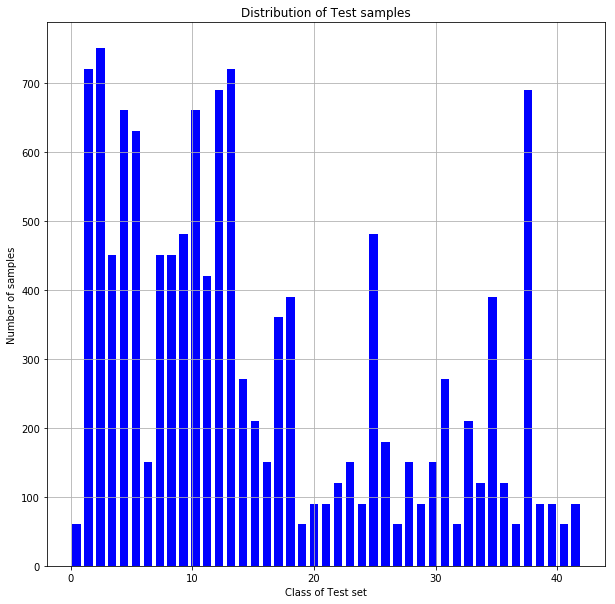

In [8]:
plot_distribution_per_class(y_test,"Class of Test set", "Number of samples", "Distribution of Test samples", 'distrib_test')

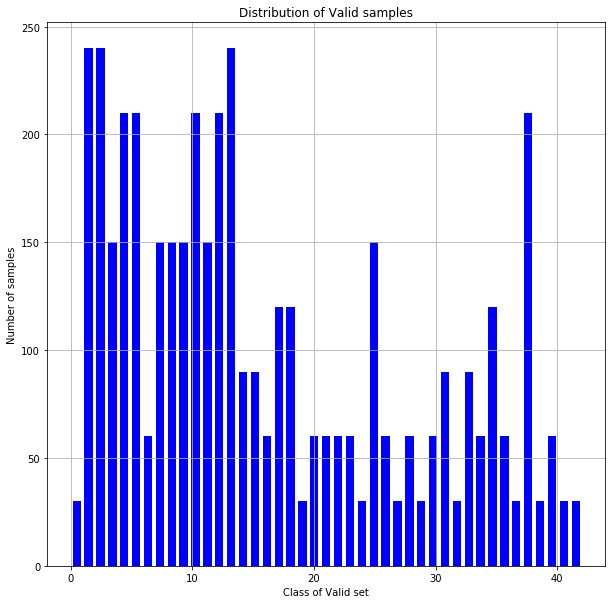

In [9]:
plot_distribution_per_class(y_valid,"Class of Valid set", "Number of samples", "Distribution of Valid samples", 'distrib_valid')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

In [10]:
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten



In [11]:
LeNetConvReuse = None

In [12]:
EPOCHS = 50
BATCH_SIZE = 128

In [24]:
class LeNetConv():
    
    def __init__(self, image_depth, epochs, learningRate, useDrooput = True, useBatchNormalization = True):
        self.image_depth = image_depth
        self.epochs = epochs
        self.learningRate = learningRate
        self.useDrooput = useDrooput
        self.useBatchNormalization = useBatchNormalization
        self.logits = None
        self.keep_prob = None
        self.phase = None
        self.KEEP_PROB = 0.5
        
    def createModel(self):
        # Hyperparameters
        global LeNetConvReuse
        mu = 0
        sigma = 0.1
        keep_prob = tf.placeholder(tf.float32)
        phase = tf.placeholder(tf.bool)
        
        self.x = tf.placeholder(tf.float32, (None, 32, 32, self.image_depth))
        self.y = tf.placeholder(tf.int32, (None))
        self.one_hot_y = tf.one_hot(self.y, 43)

        # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, self.image_depth, 6), mean = mu, stddev = sigma))
        conv1_b = tf.Variable(tf.zeros(6))
        conv1   = tf.nn.conv2d(self.x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

        # SOLUTION: Activation.
        conv1 = tf.nn.relu(conv1)

        # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

        # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(16))
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

        # SOLUTION: Activation.
        conv2 = tf.nn.relu(conv2)

        # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

        # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
        fc0   = flatten(conv2)

        # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(120))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b

        # SOLUTION: Activation.
        fc1    = tf.nn.relu(fc1)

        if(self.useDrooput):
            fc1 = tf.nn.dropout(fc1, keep_prob)

        # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(84))
        fc2    = tf.matmul(fc1, fc2_W) + fc2_b

        if self.useBatchNormalization:
            with tf.variable_scope("batch_norm_layer"):
                fc2 = tf.contrib.layers.batch_norm(fc2, 
                                                      center=True, scale=True, 
                                                      is_training=phase,
                                                      scope='bn', reuse = LeNetConvReuse)
                if LeNetConvReuse is None:
                    LeNetConvReuse = True
                
                
        # SOLUTION: Activation.
        fc2    = tf.nn.relu(fc2)
        fc2 = tf.nn.dropout(fc2, keep_prob)

        # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
        fc3_b  = tf.Variable(tf.zeros(43))
        logits = tf.matmul(fc2, fc3_W) + fc3_b
        
       
        
        
        self.logits = logits
        self.keep_prob = keep_prob
        self.phase = phase
        
        self.cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=self.one_hot_y, logits=self.logits)
        self.loss_operation = tf.reduce_mean(self.cross_entropy)
        self.optimizer = tf.train.AdamOptimizer(learning_rate = self.learningRate)
        self.training_operation = self.optimizer.minimize(self.loss_operation)
        self.correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.one_hot_y, 1))
        self.accuracy_operation = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))
        #self.incorrect_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.one_hot_y, 1))
    
    def evaluate(self, X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(self.accuracy_operation, feed_dict={self.x: batch_x, self.y: batch_y, self.keep_prob: 1., self.phase:0})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples
    
    def top_softmax(self, X_data, y_data):
        sess = tf.get_default_session()

        top_k_val, top_k_idx  = sess.run(tf.nn.top_k(tf.nn.softmax(self.logits), k=5), feed_dict={self.x: X_data, self.y: y_data, self.keep_prob: 1., self.phase:0})
        return top_k_val, top_k_idx 
    
    def wrong_predictions(self, X_data, y_data):
        num_examples = len(X_data)
        indexes = []
        predictions = []
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            top_k_val, top_k_idx  = sess.run(tf.nn.top_k(tf.nn.softmax(self.logits), k=3), feed_dict={self.x: batch_x, self.y: batch_y, self.keep_prob: 1., self.phase:0})
            results = sess.run(self.correct_prediction, feed_dict={self.x: batch_x, self.y: batch_y, self.keep_prob: 1., self.phase:0})
            for idx,pred in enumerate(results):
                if not pred:
                    indexes.append(offset+idx)
                    predictions.append(top_k_idx[idx][0])
                    print("Wrong index{0} mypred {1} correct {2}".format(offset+idx,top_k_idx[idx][0],y_data[offset+idx] ))
        return indexes, predictions
    
    def run_tf(self, X_train, y_train, X_valid, y_valid, save = False):
        saver = tf.train.Saver()
        train_acc_epoch= []
        valid_acc_epoch = []
        best_accuracy = 0
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            num_examples = len(X_train)

            print("Training...")
            for i in range(self.epochs):
                X_train, y_train = shuffle(X_train, y_train)
                for offset in range(0, num_examples, BATCH_SIZE):
                    end = offset + BATCH_SIZE
                    batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                    _,cost = sess.run([self.training_operation, self.loss_operation], feed_dict={self.x: batch_x, self.y: batch_y, self.keep_prob: self.KEEP_PROB, self.phase:1})
                training_accuracy = self.evaluate(X_train, y_train)
                validation_accuracy = self.evaluate(X_valid, y_valid)
                train_acc_epoch.append(training_accuracy)
                valid_acc_epoch.append(validation_accuracy)
                print("EPOCH {} ...".format(i+1))
                print("Training Accuracy = {:.3f}".format(training_accuracy))
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                if validation_accuracy > best_accuracy:
                    best_accuracy = validation_accuracy
                    if save:
                        saver.save(sess, './lenet')

        print("Best Validation Accuracy = {:.3f}".format(best_accuracy))
        if save:
            print("Model saved")
        sess.close()
        return (train_acc_epoch, valid_acc_epoch)
        

In [67]:
rate = 0.001
KEEP_PROB = 0.5  # dropout keep probability
image_depth = 3

convNetWithoutRegularization = LeNetConv(image_depth, EPOCHS, rate, False, False)
convNetWithoutRegularization.createModel()

convNetWithDropout = LeNetConv(image_depth, EPOCHS, rate, True, False)
convNetWithDropout.createModel()

convNetWithBatchNorm = LeNetConv(image_depth, EPOCHS, rate, False, True)
convNetWithBatchNorm.createModel()

convNetWithDropoutAndBatchNorm = LeNetConv(image_depth, EPOCHS, rate, True, True)
convNetWithDropoutAndBatchNorm.createModel()

In [68]:
without_reg_train_acc_epoch, without_reg_valid_acc_epoch = convNetWithoutRegularization.run_tf(X_train, y_train, X_valid, y_valid)

Training...
EPOCH 1 ...
Training Accuracy = 0.099
Validation Accuracy = 0.100
EPOCH 2 ...
Training Accuracy = 0.434
Validation Accuracy = 0.376
EPOCH 3 ...
Training Accuracy = 0.597
Validation Accuracy = 0.507
EPOCH 4 ...
Training Accuracy = 0.722
Validation Accuracy = 0.647
EPOCH 5 ...
Training Accuracy = 0.799
Validation Accuracy = 0.728
EPOCH 6 ...
Training Accuracy = 0.862
Validation Accuracy = 0.785
EPOCH 7 ...
Training Accuracy = 0.893
Validation Accuracy = 0.810
EPOCH 8 ...
Training Accuracy = 0.914
Validation Accuracy = 0.837
EPOCH 9 ...
Training Accuracy = 0.940
Validation Accuracy = 0.861
EPOCH 10 ...
Training Accuracy = 0.947
Validation Accuracy = 0.853
EPOCH 11 ...
Training Accuracy = 0.955
Validation Accuracy = 0.867
EPOCH 12 ...
Training Accuracy = 0.963
Validation Accuracy = 0.868
EPOCH 13 ...
Training Accuracy = 0.970
Validation Accuracy = 0.879
EPOCH 14 ...
Training Accuracy = 0.970
Validation Accuracy = 0.878
EPOCH 15 ...
Training Accuracy = 0.976
Validation Accuracy 

In [69]:
with_dropout_train_acc_epoch, with_dropout_valid_acc_epoch = convNetWithDropout.run_tf(X_train, y_train, X_valid, y_valid)

Training...
EPOCH 1 ...
Training Accuracy = 0.133
Validation Accuracy = 0.119
EPOCH 2 ...
Training Accuracy = 0.280
Validation Accuracy = 0.241
EPOCH 3 ...
Training Accuracy = 0.347
Validation Accuracy = 0.297
EPOCH 4 ...
Training Accuracy = 0.422
Validation Accuracy = 0.357
EPOCH 5 ...
Training Accuracy = 0.495
Validation Accuracy = 0.439
EPOCH 6 ...
Training Accuracy = 0.532
Validation Accuracy = 0.462
EPOCH 7 ...
Training Accuracy = 0.631
Validation Accuracy = 0.562
EPOCH 8 ...
Training Accuracy = 0.652
Validation Accuracy = 0.597
EPOCH 9 ...
Training Accuracy = 0.670
Validation Accuracy = 0.617
EPOCH 10 ...
Training Accuracy = 0.721
Validation Accuracy = 0.655
EPOCH 11 ...
Training Accuracy = 0.757
Validation Accuracy = 0.708
EPOCH 12 ...
Training Accuracy = 0.765
Validation Accuracy = 0.709
EPOCH 13 ...
Training Accuracy = 0.795
Validation Accuracy = 0.746
EPOCH 14 ...
Training Accuracy = 0.836
Validation Accuracy = 0.785
EPOCH 15 ...
Training Accuracy = 0.849
Validation Accuracy 

In [70]:
with_batchnorm_train_acc_epoch, with_batchnorm_valid_acc_epoch = convNetWithBatchNorm.run_tf(X_train, y_train, X_valid, y_valid)

Training...
EPOCH 1 ...
Training Accuracy = 0.782
Validation Accuracy = 0.708
EPOCH 2 ...
Training Accuracy = 0.940
Validation Accuracy = 0.883
EPOCH 3 ...
Training Accuracy = 0.960
Validation Accuracy = 0.903
EPOCH 4 ...
Training Accuracy = 0.977
Validation Accuracy = 0.916
EPOCH 5 ...
Training Accuracy = 0.978
Validation Accuracy = 0.907
EPOCH 6 ...
Training Accuracy = 0.987
Validation Accuracy = 0.926
EPOCH 7 ...
Training Accuracy = 0.990
Validation Accuracy = 0.939
EPOCH 8 ...
Training Accuracy = 0.987
Validation Accuracy = 0.918
EPOCH 9 ...
Training Accuracy = 0.990
Validation Accuracy = 0.940
EPOCH 10 ...
Training Accuracy = 0.997
Validation Accuracy = 0.942
EPOCH 11 ...
Training Accuracy = 0.992
Validation Accuracy = 0.927
EPOCH 12 ...
Training Accuracy = 0.997
Validation Accuracy = 0.938
EPOCH 13 ...
Training Accuracy = 0.994
Validation Accuracy = 0.939
EPOCH 14 ...
Training Accuracy = 0.999
Validation Accuracy = 0.939
EPOCH 15 ...
Training Accuracy = 0.996
Validation Accuracy 

In [71]:
with_dropout_and_batchnorm_train_acc_epoch, with_dropout_and_batchnorm_valid_acc_epoch = convNetWithDropoutAndBatchNorm.run_tf(X_train, y_train, X_valid, y_valid)

Training...
EPOCH 1 ...
Training Accuracy = 0.567
Validation Accuracy = 0.539
EPOCH 2 ...
Training Accuracy = 0.805
Validation Accuracy = 0.759
EPOCH 3 ...
Training Accuracy = 0.895
Validation Accuracy = 0.858
EPOCH 4 ...
Training Accuracy = 0.919
Validation Accuracy = 0.866
EPOCH 5 ...
Training Accuracy = 0.945
Validation Accuracy = 0.910
EPOCH 6 ...
Training Accuracy = 0.956
Validation Accuracy = 0.916
EPOCH 7 ...
Training Accuracy = 0.967
Validation Accuracy = 0.919
EPOCH 8 ...
Training Accuracy = 0.967
Validation Accuracy = 0.930
EPOCH 9 ...
Training Accuracy = 0.975
Validation Accuracy = 0.934
EPOCH 10 ...
Training Accuracy = 0.980
Validation Accuracy = 0.943
EPOCH 11 ...
Training Accuracy = 0.983
Validation Accuracy = 0.946
EPOCH 12 ...
Training Accuracy = 0.987
Validation Accuracy = 0.951
EPOCH 13 ...
Training Accuracy = 0.987
Validation Accuracy = 0.948
EPOCH 14 ...
Training Accuracy = 0.989
Validation Accuracy = 0.950
EPOCH 15 ...
Training Accuracy = 0.989
Validation Accuracy 

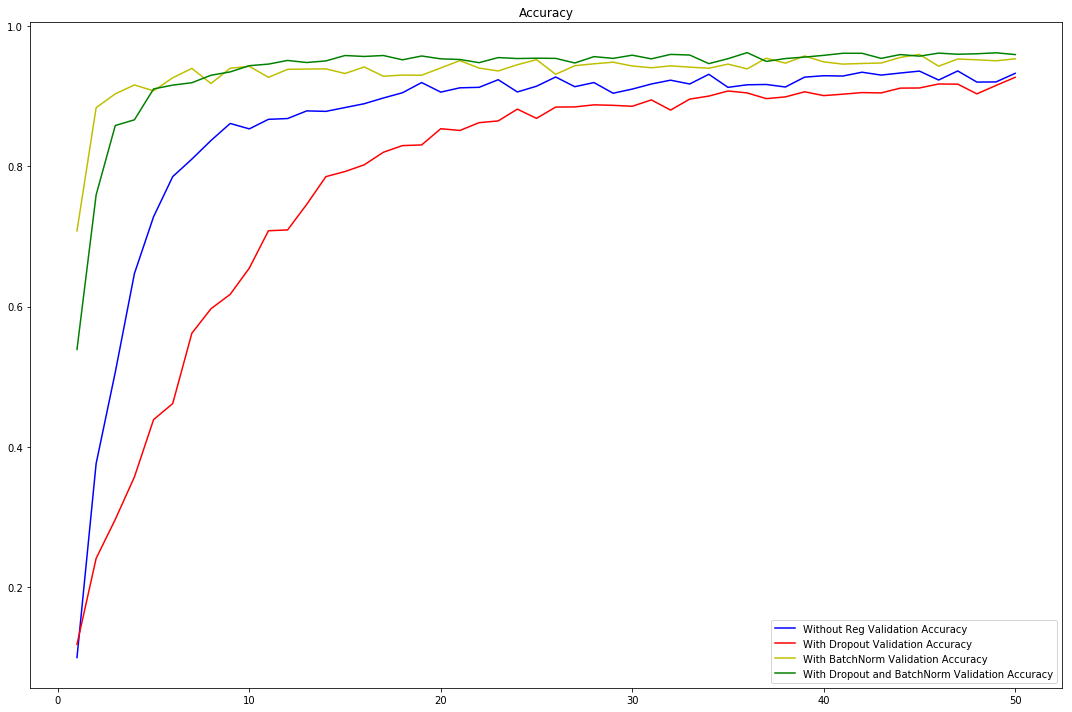

In [72]:
plt.figure(figsize=(15,10))
plt.title('Accuracy')
plt.plot(range(1,EPOCHS+1), without_reg_valid_acc_epoch, 'b', label='Without Reg Validation Accuracy')
plt.plot(range(1,EPOCHS+1), with_dropout_valid_acc_epoch, 'r', label='With Dropout Validation Accuracy')
plt.plot(range(1,EPOCHS+1), with_batchnorm_valid_acc_epoch, 'y', label='With BatchNorm Validation Accuracy')
plt.plot(range(1,EPOCHS+1), with_dropout_and_batchnorm_valid_acc_epoch, 'g', label='With Dropout and BatchNorm Validation Accuracy')
plt.legend(loc=4)
plt.tight_layout()
plt.show()
plt.savefig('examples/regularization.jpg')

In [65]:
rates = [0.001, 0.003, 0.009, 0.027, 0.081, 0.243]
convNets = []
train_lr_acc_rates = []
valid_lr_acc_rates = []
ep = 10
image_depth = 3
for rate in rates:
    convNet = LeNetConv(image_depth, ep, rate, True, True)
    convNet.createModel()
    convNets.append(convNet)
    
for convNet in convNets:
    print("Learning Rate: {0}". format(convNet.learningRate))
    with_dropout_and_batchnorm_train_acc_epoch, with_dropout_and_batchnorm_valid_acc_epoch = convNet.run_tf(X_train, y_train, X_valid, y_valid)
    train_lr_acc_rates.append(with_dropout_and_batchnorm_train_acc_epoch)
    valid_lr_acc_rates.append(with_dropout_and_batchnorm_valid_acc_epoch)
    
    


Learning Rate: 0.001
Training...
EPOCH 1 ...
Training Accuracy = 0.560
Validation Accuracy = 0.493
EPOCH 2 ...
Training Accuracy = 0.753
Validation Accuracy = 0.692
EPOCH 3 ...
Training Accuracy = 0.834
Validation Accuracy = 0.753
EPOCH 4 ...
Training Accuracy = 0.886
Validation Accuracy = 0.813
EPOCH 5 ...
Training Accuracy = 0.922
Validation Accuracy = 0.854
EPOCH 6 ...
Training Accuracy = 0.940
Validation Accuracy = 0.883
EPOCH 7 ...
Training Accuracy = 0.945
Validation Accuracy = 0.893
EPOCH 8 ...
Training Accuracy = 0.964
Validation Accuracy = 0.913
EPOCH 9 ...
Training Accuracy = 0.957
Validation Accuracy = 0.901
EPOCH 10 ...
Training Accuracy = 0.975
Validation Accuracy = 0.931
Best Validation Accuracy = 0.931
Learning Rate: 0.003
Training...
EPOCH 1 ...
Training Accuracy = 0.696
Validation Accuracy = 0.656
EPOCH 2 ...
Training Accuracy = 0.879
Validation Accuracy = 0.839
EPOCH 3 ...
Training Accuracy = 0.923
Validation Accuracy = 0.892
EPOCH 4 ...
Training Accuracy = 0.942
Vali

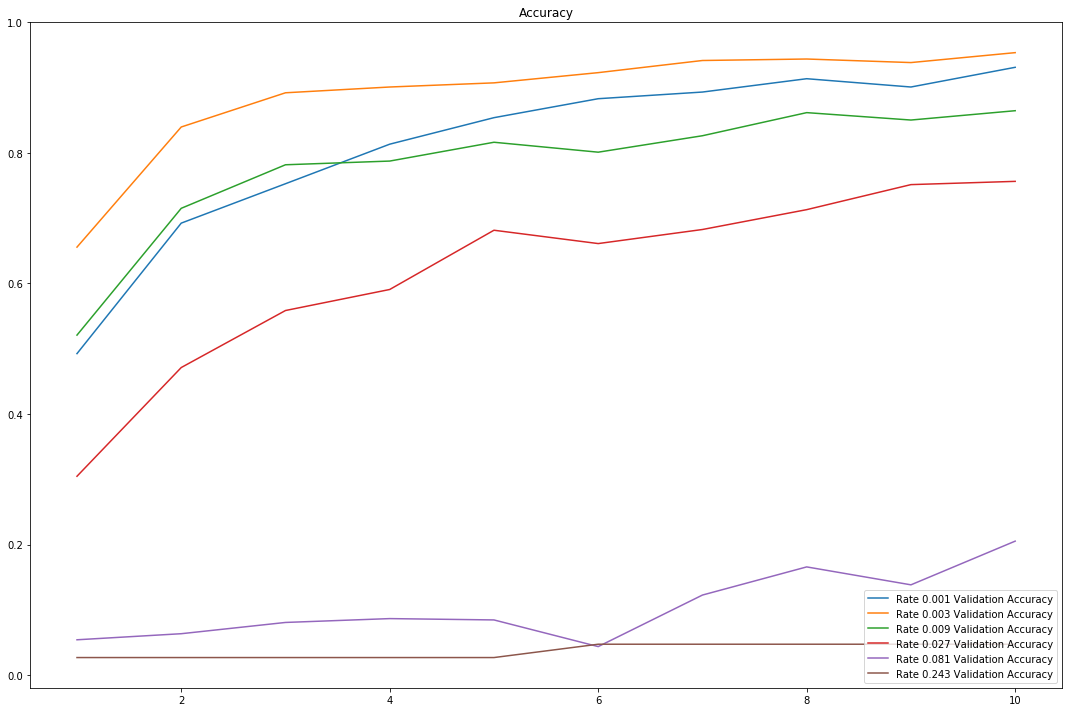

In [66]:
plt.figure(figsize=(15,10))
plt.title('Accuracy')
for index, convNet in enumerate(convNets):
    plt.plot(range(1,ep+1), valid_lr_acc_rates[index], label='Rate {0} Validation Accuracy'.format(convNet.learningRate))
    

plt.legend(loc=4)
plt.tight_layout()
plt.show()
plt.savefig('./examples/learnrate.jpg')

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [14]:
import cv2

def equalize(image):
    img = np.copy(image)
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(4,4))
    if len(image.shape) > 2 and image.shape[2] == 3:
        img[:,:,0] = clahe.apply(image[:,:,0])
    else:
        img = clahe.apply(image)
    return img

def grayscale(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.reshape(image.shape[0], image.shape[1], 1)
    #print(image.shape)
    return image

def YUV_luma_equalize(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    image = equalize(image)
    return cv2.cvtColor(image, cv2.COLOR_YUV2BGR)

def process_color(images_set):
    image_set_processed = np.copy(images_set[:,:,:])
    for idx,image in enumerate(image_set_processed):
        if idx%1000 == 0:
            print("index={0}".format(idx))
        image_set_processed[idx] = YUV_luma_equalize(image)
    return image_set_processed

def process_to_gray(images_set):
    image_set_to_be_processed = np.copy(images_set[:,:,:])
    image_set_processed = np.zeros((images_set.shape[0],images_set.shape[1],images_set.shape[2],1))

    for idx,image in enumerate(image_set_to_be_processed):
        if idx%1000 == 0:
            print("index={0}".format(idx))
        image_set_processed[idx] = equalize(grayscale(image)).reshape(image.shape[0], image.shape[1], 1)
    return image_set_processed

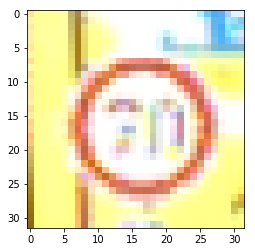

In [15]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

plt.figure()
plt.imshow(X_train[7777])
plt.show()
plt.savefig('./examples/unprocessed_color.jpg')

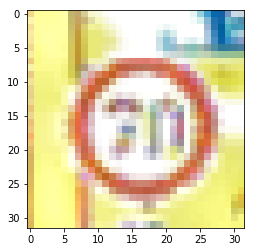

In [16]:
image =np.empty_like (X_train[7777])
np.copyto(image, X_train[7777])

image = YUV_luma_equalize(image)

plt.figure()
plt.imshow(image)
plt.show()
plt.savefig('./examples/processed_color.jpg')

(32, 32, 1)


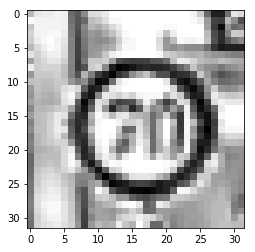

In [27]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

image =np.empty_like (X_train[7777])
np.copyto(image, X_train[7777])

image = equalize(grayscale(image)).reshape(image.shape[0],image.shape[1],1)

print(image.shape)

plt.figure()
plt.imshow(image.reshape(image.shape[0],image.shape[1]), cmap='gray')
plt.show()
plt.savefig('./examples/processed_gray.jpg')

In [18]:
X_train_processed_color = process_color(X_train)
X_valid_processed_color = process_color(X_valid)

index=0
index=1000
index=2000
index=3000
index=4000
index=5000
index=6000
index=7000
index=8000
index=9000
index=10000
index=11000
index=12000
index=13000
index=14000
index=15000
index=16000
index=17000
index=18000
index=19000
index=20000
index=21000
index=22000
index=23000
index=24000
index=25000
index=26000
index=27000
index=28000
index=29000
index=30000
index=31000
index=32000
index=33000
index=34000
index=0
index=1000
index=2000
index=3000
index=4000


In [19]:
X_train_processed_gray = process_to_gray(X_train)
X_valid_processed_gray = process_to_gray(X_valid)

index=0
index=1000
index=2000
index=3000
index=4000
index=5000
index=6000
index=7000
index=8000
index=9000
index=10000
index=11000
index=12000
index=13000
index=14000
index=15000
index=16000
index=17000
index=18000
index=19000
index=20000
index=21000
index=22000
index=23000
index=24000
index=25000
index=26000
index=27000
index=28000
index=29000
index=30000
index=31000
index=32000
index=33000
index=34000
index=0
index=1000
index=2000
index=3000
index=4000


### Model Architecture

In [20]:
print(X_train.shape)
print(X_train_processed_color.shape)
print(X_train_processed_gray.shape)
print(X_valid.shape)
print(X_valid_processed_color.shape)
print(X_valid_processed_gray.shape)

(34799, 32, 32, 3)
(34799, 32, 32, 3)
(34799, 32, 32, 1)
(4410, 32, 32, 3)
(4410, 32, 32, 3)
(4410, 32, 32, 1)


In [ ]:
image_depth = [3, 3 ,1]
inputs_train = [X_train, X_train_processed_color, X_train_processed_gray]
inputs_valid = [X_valid, X_valid_processed_color, X_valid_processed_gray]
convNets = []
train_acc_col_rates = []
valid_acc_col_rates = []
ep = 50
for depth in image_depth:
    convNet = LeNetConv(depth , ep, 0.003, True, True)
    convNet.createModel()
    convNets.append(convNet)
    
for idx,convNet in enumerate(convNets):
    print("idx: {0}". format(idx))
    train_acc, valid_acc = convNet.run_tf(inputs_train[idx], y_train, inputs_valid[idx], y_valid)
    train_acc_col_rates.append(train_acc)
    valid_acc_col_rates.append(valid_acc)
    
    


In [ ]:
plt.figure(figsize=(15,10))
plt.title('Accuracy')

plt.plot(range(1,ep+1), valid_acc_col_rates[0], label='Color No processsing Validation Accuracy')
plt.plot(range(1,ep+1), valid_acc_col_rates[1], label='Color With processsing Validation Accuracy')
plt.plot(range(1,ep+1), valid_acc_col_rates[2], label='Gray with processsing Validation Accuracy')
    

plt.legend(loc=4)
plt.tight_layout()
plt.show()
plt.savefig('./examples/color_plot2.jpg')

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [21]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [22]:
X_test_processed_color = process_color(X_test)

index=0
index=1000
index=2000
index=3000
index=4000
index=5000
index=6000
index=7000
index=8000
index=9000
index=10000
index=11000
index=12000


In [32]:
convNetFinal = LeNetConv(3, 100, 0.003, True, True)
convNetFinal.createModel()
_,__ = convNetFinal.run_tf(X_train_processed_color, y_train, X_valid_processed_color, y_valid, save = True)

Training...
EPOCH 1 ...
Training Accuracy = 0.838
Validation Accuracy = 0.795
EPOCH 2 ...
Training Accuracy = 0.926
Validation Accuracy = 0.891
EPOCH 3 ...
Training Accuracy = 0.966
Validation Accuracy = 0.936
EPOCH 4 ...
Training Accuracy = 0.980
Validation Accuracy = 0.941
EPOCH 5 ...
Training Accuracy = 0.981
Validation Accuracy = 0.949
EPOCH 6 ...
Training Accuracy = 0.989
Validation Accuracy = 0.954
EPOCH 7 ...
Training Accuracy = 0.989
Validation Accuracy = 0.954
EPOCH 8 ...
Training Accuracy = 0.991
Validation Accuracy = 0.958
EPOCH 9 ...
Training Accuracy = 0.989
Validation Accuracy = 0.952
EPOCH 10 ...
Training Accuracy = 0.987
Validation Accuracy = 0.949
EPOCH 11 ...
Training Accuracy = 0.995
Validation Accuracy = 0.967
EPOCH 12 ...
Training Accuracy = 0.994
Validation Accuracy = 0.962
EPOCH 13 ...
Training Accuracy = 0.992
Validation Accuracy = 0.962
EPOCH 14 ...
Training Accuracy = 0.995
Validation Accuracy = 0.962
EPOCH 15 ...
Training Accuracy = 0.994
Validation Accuracy 

In [33]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    test_accuracy = convNetFinal.evaluate(X_test_processed_color, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.962


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

[11, 12, 13, 14, 40]


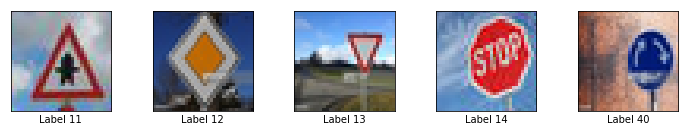

In [34]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg


img_folder = './data/'

img_names = []
img_names.append('./data/1.jpg')
img_names.append('./data/2.jpg')
img_names.append('./data/3.jpg')
img_names.append('./data/4.jpg')
img_names.append('./data/5.jpg')

img_values = []
img_values.append(11) # Right-of-way at the next intersection
img_values.append(12)    #Priority Road
img_values.append(13)  #Yield
img_values.append(14)   #Stop
img_values.append(40)   #Roundabout

print(img_values)

images = []

for image_name in img_names:
    
    image = mpimg.imread(image_name)
    images.append(image)
    
no_of_signs = 5
no_of_cols = 5


fig, axes = plt.subplots(int(np.ceil(no_of_signs/no_of_cols)), no_of_cols, figsize=(10,10))
fig.tight_layout()

for i, axis in enumerate(axes.flat):
    if i<no_of_signs: 
        axis.imshow(images[i])
        xlabel = "Label {0}".format(img_values[i])
        axis.set_xlabel(xlabel)
    axis.set_xticks([])
    axis.set_yticks([])    


plt.show()

### Predict the Sign Type for Each Image

index=0


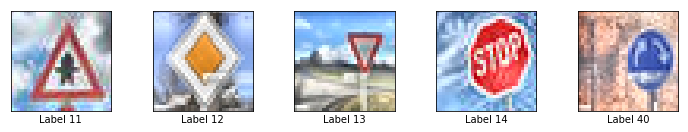

In [35]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

img_processed_color = process_color(np.array(images))

no_of_signs = 5
no_of_cols = 5


fig, axes = plt.subplots(int(np.ceil(no_of_signs/no_of_cols)), no_of_cols, figsize=(10,10))
fig.tight_layout()

for i, axis in enumerate(axes.flat):
    if i<no_of_signs: 
        axis.imshow(img_processed_color[i])
        xlabel = "Label {0}".format(img_values[i])
        axis.set_xlabel(xlabel)
    axis.set_xticks([])
    axis.set_yticks([])    

### Analyze Performance

In [36]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    test_accuracy = convNetFinal.evaluate(img_processed_color, img_values)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.600


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [64]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.


saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    
    results = sess.run(tf.nn.softmax(convNetFinal.logits), feed_dict={convNetFinal.x: img_processed_color, convNetFinal.y: img_values, convNetFinal.keep_prob: 1., convNetFinal.phase:0})
    top_k_val, top_k_idx  = sess.run(tf.nn.top_k(tf.constant(results), k=5, sorted=True))
    print(top_k_val)
    print(top_k_idx)
print(img_values)

[[ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]]
[[11  0  1  2  3]
 [12  0  1  2  3]
 [23  0  1  2  3]
 [14  0  1  2  3]
 [36  0  1  2  3]]
[11, 12, 13, 14, 40]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")